# U.S. Educational Data Explorer Tool

*Justin Roy Garrard*

This Notebook provides interactive visualizations that users can operate to find specific information. **These visualizations will not show up on Kaggle's display page.** You will need to either download the notebook code or run it in Kaggle's editor.

*Author's Note: Repurposed for hosting in the Git repository.*

### Data Load
This section details the process of loading data into the notebook.

In [1]:
# Imports
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plot formatting
from ipywidgets import * # interactive plots
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import us # list of state names

In [2]:
# List local files
print(os.listdir('../data/processed'))

['enroll_states_summary.csv', 'enroll_districts_raw.csv', 'INSTRUCTIONS.md', '.gitkeep', 'states_all.csv', 'enroll_districts.csv', 'naep_states.csv', 'finance_states.csv', 'finance_districts.csv', 'naep_states_raw.csv', 'naep_states_summary.csv', 'enroll_states.csv', 'states_all_extended.csv', 'enroll_states_raw.csv']


In [3]:
# Load data
nRowsRead = None # specify 'None' if want to read whole file
base_df = pd.read_csv('../data/processed/states_all.csv', delimiter=',', nrows = nRowsRead)


base_df.dataframeName = 'states_all.csv'
nRow, nCol = base_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1715 rows and 25 columns


In [4]:
# Subset of states-only data
'''
Data for U.S. Territories is fairly erratic; limiting records to states simplifies preliminary analysis.
'''
STATES = [str(x).upper() for x in us.STATES]
states_df = base_df[base_df['STATE'].isin(STATES)].copy()
print('Initial Count: {}'.format(len(base_df)))
print('States-Only Count: {}'.format(len(states_df)))

Initial Count: 1715
States-Only Count: 1320


In [5]:
# List nulls
for col in states_df.columns:
    nulls = states_df[col].isnull().sum()
    print(col + ': ' + str(nulls))

PRIMARY_KEY: 0
STATE: 0
YEAR: 0
ENROLL: 360
TOTAL_REVENUE: 320
FEDERAL_REVENUE: 320
STATE_REVENUE: 320
LOCAL_REVENUE: 320
TOTAL_EXPENDITURE: 320
INSTRUCTION_EXPENDITURE: 320
SUPPORT_SERVICES_EXPENDITURE: 320
OTHER_EXPENDITURE: 360
CAPITAL_OUTLAY_EXPENDITURE: 320
GRADES_PK_G: 117
GRADES_KG_G: 40
GRADES_4_G: 40
GRADES_8_G: 40
GRADES_12_G: 40
GRADES_1_8_G: 520
GRADES_9_12_G: 480
GRADES_ALL_G: 40
AVG_MATH_4_SCORE: 895
AVG_MATH_8_SCORE: 867
AVG_READING_4_SCORE: 830
AVG_READING_8_SCORE: 896


In [6]:
# Sample data
display(states_df.head(5))

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [7]:
YEAR_RANGE=states_df['YEAR'].unique()
display(YEAR_RANGE)

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 1986, 1987, 1988, 1989, 1990, 1991, 2017, 2019])

### Financial Data Set

This section focuses on data from the U.S. Census Bureau on school finances. 

In [8]:
finance_keys = ['PRIMARY_KEY', 'STATE', 'YEAR',
                      'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
                      'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
                      'CAPITAL_OUTLAY_EXPENDITURE', 'OTHER_EXPENDITURE']
finance_keys_mappings = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
                      'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
                      'CAPITAL_OUTLAY_EXPENDITURE', 'OTHER_EXPENDITURE']
finance_df = states_df[finance_keys]

In [9]:
# Interactive plot
# Metrics by state, by year
%matplotlib notebook

sort_by_keys_mappings = ['Numerical', 'Alphabetical']

@interact(year=(YEAR_RANGE[0],YEAR_RANGE[-1],1), metric=finance_keys_mappings, sort_by=sort_by_keys_mappings)
def metric_explorer(year, metric, sort_by):
    # Clear any old figures
    plt.close()
    plt.style.use('ggplot')
    
    # Take a snapshot of the data for the given year
    snapshot = finance_df[finance_df['YEAR'] == year].copy()
    if sort_by == 'Alphabetical':
        snapshot.sort_values('STATE', ascending=False, inplace=True)
    else:
        snapshot.sort_values(metric, ascending=True, inplace=True)
    y_pos = np.arange(len(snapshot[metric]))
    
    # Make a plot to match states to the chosen metric
    plt.figure(figsize=(8, 10), num='Financial Metric Explorer Tool')
    plt.barh(y_pos, snapshot[metric])
    plt.yticks(y_pos, snapshot['STATE'])
    plt.title('{0}: {1}'.format(metric, year))

    
interactive_plot = interactive(metric_explorer, year=2005, metric=finance_keys_mappings[0], sort_by=sort_by_keys_mappings[0])

interactive(children=(IntSlider(value=2005, description='year', max=2019, min=1992), Dropdown(description='met…

In [10]:
# Interactive plot
# Metrics across years, by state
%matplotlib notebook

@interact(state=STATES, metric=finance_keys_mappings)
def state_explorer(state, metric):
    # Clear any old figures
    plt.close()
    plt.style.use('ggplot')
    
    # Take a snapshot of the data for the given year
    snapshot = finance_df[finance_df['STATE'] == state].copy()
    
    # Make a plot to match states to the chosen metric
    plt.figure(figsize=(8, 10), num='Financial State Explorer Tool')
    plt.plot(YEAR_RANGE, snapshot[metric], '-o')
    plt.title('{0}: {1}'.format(metric, state))

    
interactive_plot = interactive(state_explorer, state='ALABAMA', metric=finance_keys_mappings[0])

interactive(children=(Dropdown(description='state', options=('ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALI…

**Enrollment Set**

This section focuses on data from the National Center for Educational Statistics (NCES) on enrollment. 

In [11]:
enrollment_keys = ['PRIMARY_KEY', 'STATE', 'YEAR',
                      'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
                      'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'ENROLL']
enrollment_keys_mappings = ['GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
                      'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'ENROLL']
sort_by_keys_mappings = ['Numerical', 'Alphabetical']
enroll_df = states_df[enrollment_keys]

In [12]:
# Interactive plot
# Metrics by state, by year
%matplotlib notebook

@interact(year=(YEAR_RANGE[0],YEAR_RANGE[-1],1), metric=enrollment_keys_mappings, sort_by=sort_by_keys_mappings)
def metric_explorer(year, metric, sort_by):
    # Clear any old figures
    plt.close()
    plt.style.use('ggplot')
    
    # Take a snapshot of the data for the given year
    snapshot = enroll_df[finance_df['YEAR'] == year].copy()
    if sort_by == 'Alphabetical':
        snapshot.sort_values('STATE', ascending=False, inplace=True)
    else:
        snapshot.sort_values(metric, ascending=True, inplace=True)
    y_pos = np.arange(len(snapshot[metric]))
    
    # Make a plot to match states to the chosen metric
    plt.figure(figsize=(8, 10), num='Enrollment Metric Explorer Tool')
    plt.barh(y_pos, snapshot[metric], color='blue')
    plt.yticks(y_pos, snapshot['STATE'])
    plt.title('{0}: {1}'.format(metric, year))

    
interactive_plot = interactive(metric_explorer, year=2005, metric=enrollment_keys_mappings[0], sort_by=sort_by_keys_mappings[0])

interactive(children=(IntSlider(value=2005, description='year', max=2019, min=1992), Dropdown(description='met…

In [13]:
# Interactive plot
# Metrics across years, by state
%matplotlib notebook

@interact(state=STATES, metric=enrollment_keys_mappings)
def state_explorer(state, metric):
    # Clear any old figures
    plt.close()
    plt.style.use('ggplot')
    
    # Take a snapshot of the data for the given year
    snapshot = enroll_df[enroll_df['STATE'] == state].copy()
    
    # Make a plot to match states to the chosen metric
    plt.figure(figsize=(8, 10), num='Enrollment State Explorer Tool')
    plt.plot(YEAR_RANGE, snapshot[metric], '-bo')
    plt.title('{0}: {1}'.format(metric, state))

    
interactive_plot = interactive(state_explorer, state='ALABAMA', metric=enrollment_keys_mappings[0])

interactive(children=(Dropdown(description='state', options=('ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALI…

**Academics Set**

This section focuses on data from the National Assement of Educational Progress (NAEP) on academic achievement. Note that this data is only available for certain years.

In [14]:
acad_keys = ['PRIMARY_KEY', 'STATE', 'YEAR',
                      'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']
acad_keys_mappings = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

sort_by_keys_mappings = ['Numerical', 'Alphabetical']
acad_df = states_df[acad_keys]

In [15]:
# Interactive plot
# Metrics by state, by year
%matplotlib notebook

@interact(year=(YEAR_RANGE[0],YEAR_RANGE[-1],1), metric=acad_keys_mappings, sort_by=sort_by_keys_mappings)
def metric_explorer(year, metric, sort_by):
    # Clear any old figures
    plt.close()
    plt.style.use('ggplot')
    
    # Take a snapshot of the data for the given year
    snapshot = acad_df[acad_df['YEAR'] == year].copy()
    if sort_by == 'Alphabetical':
        snapshot.sort_values('STATE', ascending=False, inplace=True)
    else:
        snapshot.sort_values(metric, ascending=True, inplace=True)
    y_pos = np.arange(len(snapshot[metric]))
    
    # Make a plot to match states to the chosen metric
    plt.figure(figsize=(8, 10), num='Academic Metric Explorer Tool')
    plt.barh(y_pos, snapshot[metric], color='green')
    plt.yticks(y_pos, snapshot['STATE'])
    plt.title('{0}: {1}'.format(metric, year))

    
interactive_plot = interactive(metric_explorer, year=2009, metric=acad_keys_mappings[0], sort_by=sort_by_keys_mappings[0])

interactive(children=(IntSlider(value=2005, description='year', max=2019, min=1992), Dropdown(description='met…

In [16]:
# Interactive plot
# Metrics across years, by state
%matplotlib notebook

@interact(state=STATES, metric=acad_keys_mappings)
def state_explorer(state, metric):
    # Clear any old figures
    plt.close()
    plt.style.use('ggplot')
    
    # Take a snapshot of the data for the given year
    snapshot = acad_df[acad_df['STATE'] == state].copy()
    
    # Make a plot to match states to the chosen metric
    plt.figure(figsize=(8, 10), num='Academics State Explorer Tool')
    # Mask missing values to allow for a line plot
    null_mask = np.isfinite(snapshot[metric])
    plt.plot(YEAR_RANGE[null_mask], snapshot[metric][null_mask], '-go')
    plt.title('{0}: {1}'.format(metric, state))

    
interactive_plot = interactive(state_explorer, state='ALABAMA', metric=acad_keys_mappings[0])

interactive(children=(Dropdown(description='state', options=('ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALI…

### Correlation Matrix (simple)

<IPython.core.display.Javascript object>


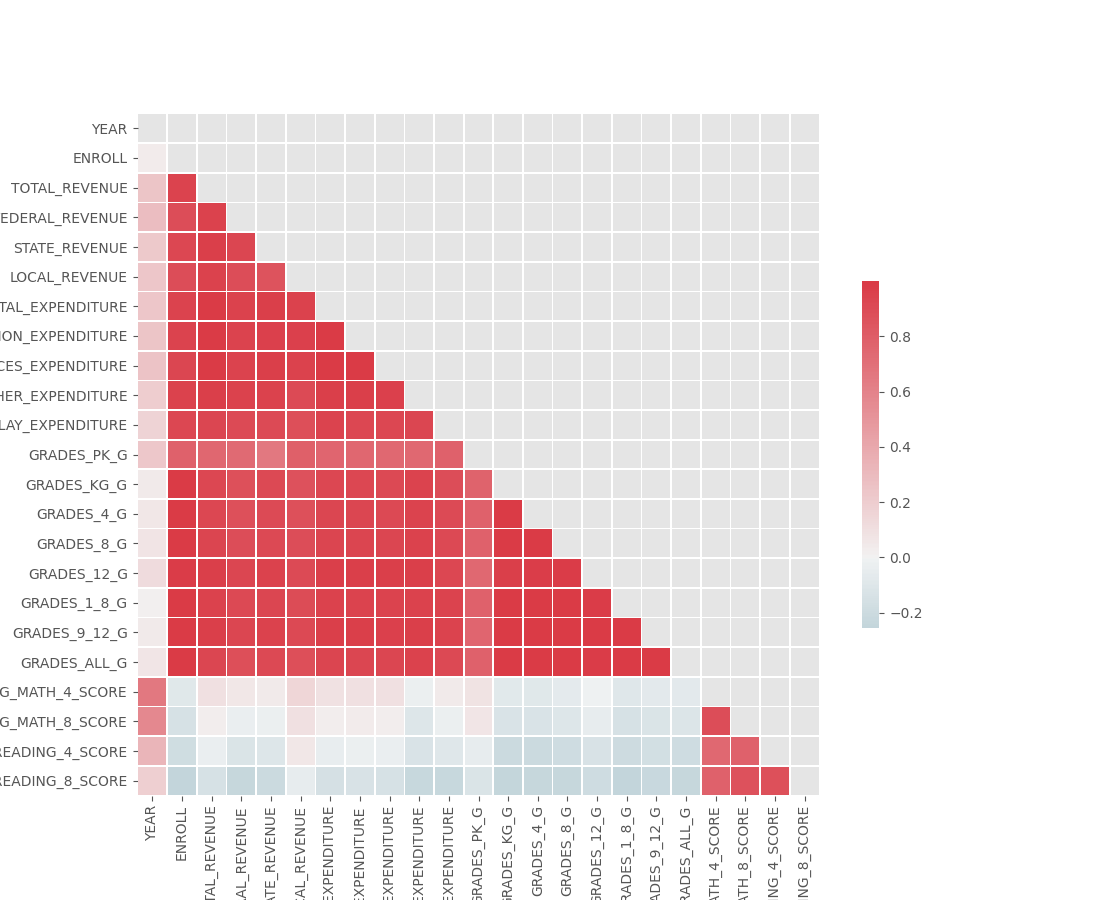

<AxesSubplot:>

In [17]:
# Compute the correlation matrix
corr = states_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})